In [4]:
import scanpy as sc
adata = sc.read_h5ad("C:/Users/ellio/Downloads/GTEx_8_tissues_snRNAseq_atlas_071421.public_obs.h5ad")

In [6]:
print(adata.obs['tissue'].unique())

['skeletalmuscle', 'breast', 'esophagusmucosa', 'esophagusmuscularis', 'heart', 'lung', 'prostate', 'skin']
Categories (8, object): ['breast', 'esophagusmucosa', 'esophagusmuscularis', 'heart', 'lung', 'prostate', 'skeletalmuscle', 'skin']


In [22]:
# Subset the AnnData object to only include lung tissue
lung_adata = adata[adata.obs['tissue'] == 'lung'].copy()

# Check the new object
print(lung_adata.obs['tissue'].unique())


['lung']
Categories (1, object): ['lung']


In [12]:
print(lung_adata.obs['Broad cell type'].unique())
print(lung_adata.obs['Granular cell type'].unique())
print(lung_adata.obs['Cell types level 2'].unique())
print(lung_adata.obs['Cell types level 3'].unique())

['Epithelial cell (alveolar type II)', 'Immune (alveolar macrophage)', 'Epithelial cell (ciliated)', 'Epithelial cell (alveolar type I)', 'Immune (DC/macrophage)', ..., 'Epithelial cell (basal)', 'Immune (T cell)', 'Immune (mast cell)', 'Immune (NK cell)', 'Immune (B cell)']
Length: 15
Categories (15, object): ['Endothelial cell (lymphatic)', 'Endothelial cell (vascular)', 'Epithelial cell (alveolar type I)', 'Epithelial cell (alveolar type II)', ..., 'Immune (T cell)', 'Immune (alveolar macrophage)', 'Immune (mast cell)', 'Pericyte/SMC']
['Epithelial cell (alveolar type II)', 'Epithelial cell (ciliated)', 'Immune (alveolar macrophage)', 'Immune (alveolar macrophage activated)', 'Epithelial cell (alveolar type I)', ..., 'Immune (mast cell)', 'Immune (T cell)', 'Immune (NK cell)', 'Immune (B cell)', 'Immune (macrophage activated)']
Length: 20
Categories (20, object): ['Endothelial cell (lymphatic)', 'Endothelial cell (vascular) I', 'Endothelial cell (vascular) II', 'Endothelial cell (va

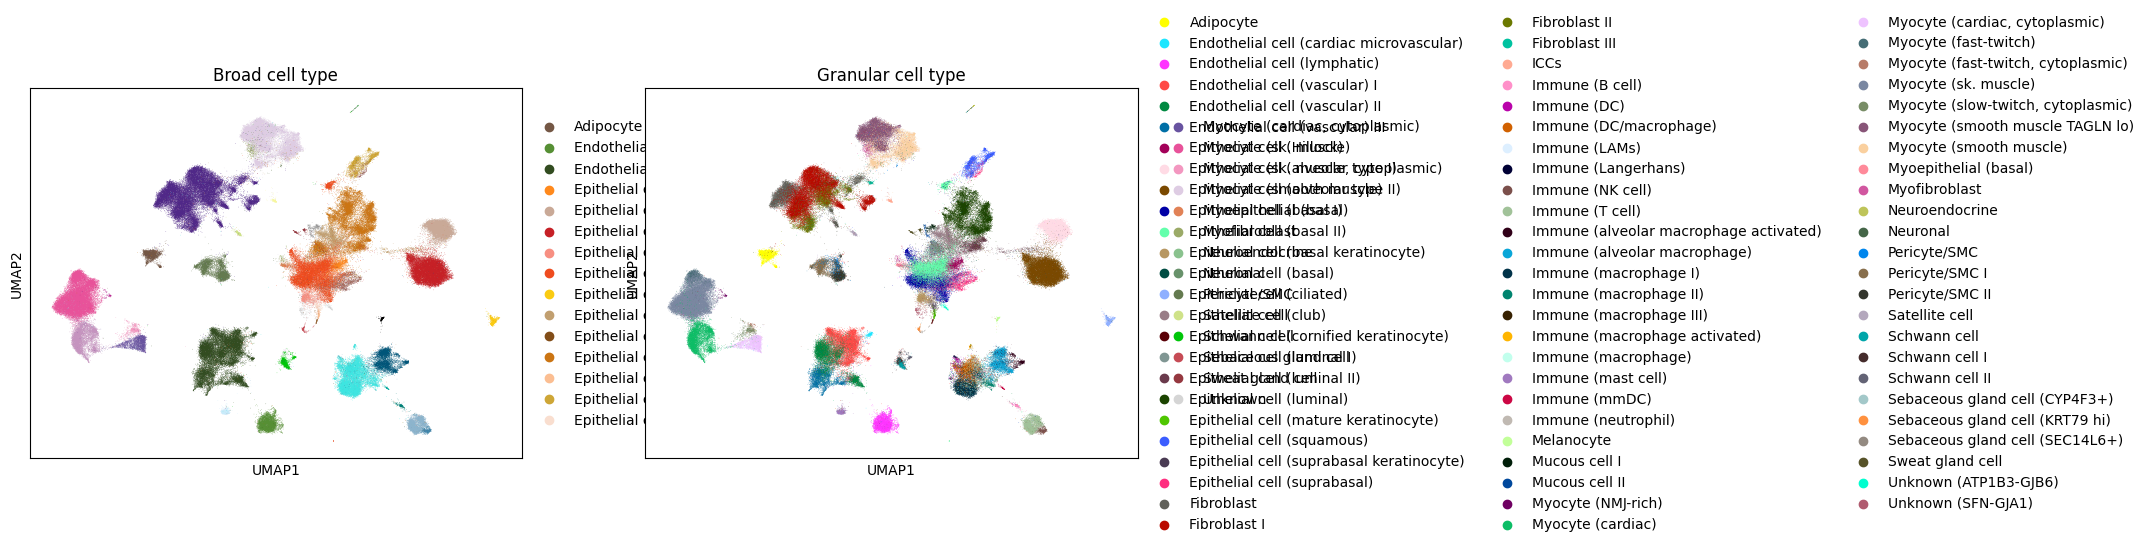

In [16]:
sc.pl.umap(adata, color=['Broad cell type', 'Granular cell type'])

In [23]:
import scanpy as sc

# Normalize the data by total counts per cell and scale to 10,000 reads per cell
sc.pp.normalize_total(lung_adata, target_sum=1e4)

# Log-transform the data after adding a pseudocount of 1
sc.pp.log1p(lung_adata)


In [24]:
# Perform batch correction using ComBat for protocol and sex-specific effects
sc.pp.combat(lung_adata, key='batch')  # Assuming 'Sex' is in lung_adata.obs, or replace with another batch key


Found 254 genes with zero variance.


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\preprocessing\_combat.py:351: RuntimeWarning: invalid value encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\preprocessing\_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [25]:
# For this, we'll assume 'Broad cell type' or another cell type identifier is available in `obs`.
# You can use sc.tl.rank_genes_groups to perform differential expression analysis
sc.tl.rank_genes_groups(lung_adata, 'Broad cell type', method='t-test', use_raw=False) 


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan

In [29]:
import pandas as pd

# Extract all marker genes
all_markers = sc.get.rank_genes_groups_df(lung_adata, group=None)

# Sort by log2fc within each group
all_markers_sorted = all_markers.sort_values(['group', 'logfoldchanges'], ascending=[True, False])

# Function to get top N genes for each group
def get_top_n_genes(group, n=10):
    return ', '.join(group['names'].head(n))

# Summarize top N markers for each cell type
top_n = 10  # Change this to the number of top markers you want
summary = all_markers_sorted.groupby('group').apply(get_top_n_genes, n=top_n).reset_index()
summary.columns = ['Cell Type', f'Top {top_n} Markers']

# Print the result to verify
print(summary)

# If you want to save this to a CSV file:
# summary.to_csv('top_markers_by_celltype.csv', index=False)

                             Cell Type  \
0         Endothelial cell (lymphatic)   
1          Endothelial cell (vascular)   
2    Epithelial cell (alveolar type I)   
3   Epithelial cell (alveolar type II)   
4              Epithelial cell (basal)   
5           Epithelial cell (ciliated)   
6               Epithelial cell (club)   
7                           Fibroblast   
8                      Immune (B cell)   
9               Immune (DC/macrophage)   
10                    Immune (NK cell)   
11                     Immune (T cell)   
12        Immune (alveolar macrophage)   
13                  Immune (mast cell)   
14                        Pericyte/SMC   

                                       Top 10 Markers  
0   CCL21, MMRN1, PKHD1L1, PROX1, TBX1, LRCOL1, GP...  
1   PTPRB, CALCRL, SOX17, ACKR1, BTNL9, EGFL7, TME...  
2   RTKN2, CAV1, NCKAP5, ST6GALNAC5, SCEL, NTM, ZB...  
3   SFTPA1, SFTPC, LRRK2, SFTPA2, LAMP3, PTGFR, CC...  
4   KRT17, KRT5, HTR1F, DUSP9, COL7A1, GPR87, P

C:\Users\ellio\AppData\Local\Temp\ipykernel_233260\3312969065.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = all_markers_sorted.groupby('group').apply(get_top_n_genes, n=top_n).reset_index()
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260\3312969065.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = all_markers_sorted.groupby('group').apply(get_top_n_genes, n=top_n).reset_index()


In [35]:
import pandas as pd
import scanpy as sc

def analyze_markers_seurat_style(adata, groupby, n_genes=10):
    # Perform differential expression analysis
    sc.tl.rank_genes_groups(adata, groupby=groupby, method='t-test', use_raw=False)
    
    # Get the results
    markers = sc.get.rank_genes_groups_df(adata, group=None)
    
    # Rename columns to match Seurat style
    markers = markers.rename(columns={
        'names': 'gene',
        'scores': 'avg_log2FC',
        'pvals_adj': 'p_val_adj',
        'logfoldchanges': 'avg_diff',
        'pvals': 'p_val'
    })
    
    # Add additional columns
    markers['cluster'] = markers['group']

    # Sort by avg_log2FC within each group
    markers_sorted = markers.sort_values(['cluster', 'avg_log2FC'], ascending=[True, False])
    
    # Select top N genes for each group
    top_markers = markers_sorted.groupby('cluster').head(n_genes)
    
    # Reorder columns to match Seurat style
    columns_order = ['gene', 'avg_log2FC', 'p_val', 'p_val_adj', 'cluster', 'avg_diff']
    top_markers = top_markers[columns_order]
    
    return top_markers

# List of annotation levels
annotation_levels = ['Broad cell type', 'Granular cell type', 'Cell types level 2', 'Cell types level 3']

# Dictionary to store results for each annotation level
results = {}

# Perform analysis for each annotation level
for level in annotation_levels:
    print(f"Analyzing {level}...")
    results[level] = analyze_markers_seurat_style(lung_adata, level)
    print(f"Analysis for {level} completed.")

# Print the first few rows of each DataFrame
for level, df in results.items():
    print(f"\nTop markers for {level}:")
    print(df.head())

# Export each DataFrame to a separate CSV file
for level, df in results.items():
    filename = f"top_markers_{level.replace(' ', '_').lower()}_seurat_style.csv"
    df.to_csv(filename, index=False)
    print(f"Results for {level} exported to '{filename}'")

Analyzing Broad cell type...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan

Analysis for Broad cell type completed.
Analyzing Granular cell type...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan

Analysis for Granular cell type completed.
Analyzing Cell types level 2...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260

Analysis for Cell types level 2 completed.
Analyzing Cell types level 3...
Analysis for Cell types level 3 completed.

Top markers for Broad cell type:
         gene  avg_log2FC          p_val      p_val_adj  \
0     PKHD1L1   31.588068  2.988282e-102  1.094775e-100   
1  ST6GALNAC3   26.172028   4.604892e-83   1.265273e-81   
2       KALRN   25.000664   1.653826e-78   4.253553e-77   
3       MMRN1   24.168516   2.959772e-75   7.145043e-74   
4     PPFIBP1   23.596031   3.050929e-73   7.122187e-72   

                        cluster  avg_diff  
0  Endothelial cell (lymphatic)  7.917006  
1  Endothelial cell (lymphatic)  4.444480  
2  Endothelial cell (lymphatic)  5.353640  
3  Endothelial cell (lymphatic)  8.302582  
4  Endothelial cell (lymphatic)  4.213744  

Top markers for Granular cell type:
         gene  avg_log2FC          p_val      p_val_adj  \
0     PKHD1L1   32.262321  3.944276e-105  1.665727e-103   
1  ST6GALNAC3   26.097507   3.609092e-83   1.075133e-81   
2       KALRN  

d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260\234587839.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_markers = markers_sorted.groupby('cluster').head(n_genes)


In [36]:
import pandas as pd
import scanpy as sc

def analyze_markers(adata, groupby, n_genes=10):
    # Perform differential expression analysis
    sc.tl.rank_genes_groups(adata, groupby=groupby, method='t-test', use_raw=False)
    
    # Get the default Scanpy results
    default_markers = sc.get.rank_genes_groups_df(adata, group=None)
    
    # Modified version
    modified_markers = default_markers.copy()
    modified_markers = modified_markers.sort_values(['group', 'logfoldchanges'], ascending=[True, False])
    
    top_markers = modified_markers.groupby('group').apply(
        lambda x: ', '.join(x['names'].head(n_genes))
    ).reset_index()
    top_markers.columns = [groupby, f'Top {n_genes} Markers']
    
    return default_markers, top_markers

# Choose one annotation level for demonstration
level = 'Broad cell type'

print(f"Analyzing {level}...")
default_df, modified_df = analyze_markers(lung_adata, level)

print("\nDefault Scanpy output:")
print(default_df.head(10))

print("\nModified output:")
print(modified_df.head())

# Export both DataFrames to separate CSV files
default_df.to_csv(f"default_markers_{level.replace(' ', '_').lower()}.csv", index=False)
modified_df.to_csv(f"modified_markers_{level.replace(' ', '_').lower()}.csv", index=False)

print(f"\nResults exported to CSV files.")

Analyzing Broad cell type...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan


Default Scanpy output:
                          group       names     scores  logfoldchanges  \
0  Endothelial cell (lymphatic)     PKHD1L1  31.588068        7.917006   
1  Endothelial cell (lymphatic)  ST6GALNAC3  26.172028        4.444480   
2  Endothelial cell (lymphatic)       KALRN  25.000664        5.353640   
3  Endothelial cell (lymphatic)       MMRN1  24.168516        8.302582   
4  Endothelial cell (lymphatic)     PPFIBP1  23.596031        4.213744   
5  Endothelial cell (lymphatic)        LDB2  23.229717        4.576091   
6  Endothelial cell (lymphatic)        CD36  22.260248        3.485282   
7  Endothelial cell (lymphatic)      SEMA3A  21.482239        5.203740   
8  Endothelial cell (lymphatic)       TSHZ2  21.401615        4.773312   
9  Endothelial cell (lymphatic)       FBXL7  20.861246        4.068457   

           pvals      pvals_adj  
0  2.988282e-102  1.094775e-100  
1   4.604892e-83   1.265273e-81  
2   1.653826e-78   4.253553e-77  
3   2.959772e-75   7.1450

In [33]:
import pandas as pd
import scanpy as sc

def analyze_markers(adata, groupby, n_genes=10):
    # Perform differential expression analysis
    sc.tl.rank_genes_groups(adata, groupby=groupby, method='t-test', use_raw=False)
    
    # Get the results
    markers = sc.get.rank_genes_groups_df(adata, group=None)
    
    # Sort by log2fc within each group
    markers_sorted = markers.sort_values(['group', 'logfoldchanges'], ascending=[True, False])
    
    # Get top N genes for each group
    top_markers = markers_sorted.groupby('group').apply(
        lambda x: ', '.join(x['names'].head(n_genes))
    ).reset_index()
    top_markers.columns = [groupby, f'Top {n_genes} Markers']
    
    return top_markers

# List of annotation levels
annotation_levels = ['Broad cell type', 'Granular cell type', 'Cell types level 2', 'Cell types level 3']

# Dictionary to store results for each annotation level
results = {}

# Perform analysis for each annotation level
for level in annotation_levels:
    print(f"Analyzing {level}...")
    results[level] = analyze_markers(lung_adata, level)
    print(f"Analysis for {level} completed.")

# Print the first few rows of each DataFrame
for level, df in results.items():
    print(f"\nTop markers for {level}:")
    print(df.head())

# Export each DataFrame to a separate CSV file
for level, df in results.items():
    filename = f"top_markers_{level.replace(' ', '_').lower()}.csv"
    df.to_csv(filename, index=False)
    print(f"Results for {level} exported to '{filename}'")

Analyzing Broad cell type...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan

Analysis for Broad cell type completed.
Analyzing Granular cell type...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan

Analysis for Granular cell type completed.
Analyzing Cell types level 2...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260

Analysis for Cell types level 2 completed.
Analyzing Cell types level 3...
Analysis for Cell types level 3 completed.

Top markers for Broad cell type:
                      Broad cell type  \
0        Endothelial cell (lymphatic)   
1         Endothelial cell (vascular)   
2   Epithelial cell (alveolar type I)   
3  Epithelial cell (alveolar type II)   
4             Epithelial cell (basal)   

                                      Top 10 Markers  
0  CCL21, MMRN1, PKHD1L1, PROX1, TBX1, LRCOL1, GP...  
1  PTPRB, CALCRL, SOX17, ACKR1, BTNL9, EGFL7, TME...  
2  RTKN2, CAV1, NCKAP5, ST6GALNAC5, SCEL, NTM, ZB...  
3  SFTPA1, SFTPC, LRRK2, SFTPA2, LAMP3, PTGFR, CC...  
4  KRT17, KRT5, HTR1F, DUSP9, COL7A1, GPR87, PRR1...  

Top markers for Granular cell type:
                  Granular cell type  \
0       Endothelial cell (lymphatic)   
1      Endothelial cell (vascular) I   
2     Endothelial cell (vascular) II   
3    Endothelial cell (vascular) III   
4  Epithelial cell (alveolar type 

d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260\3408709147.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_markers = markers_sorted.groupby('group').apply(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260\3408709147.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the oper

In [37]:
##final version

import pandas as pd
import scanpy as sc

def analyze_markers(adata, groupby, n_genes=10):
    # Perform differential expression analysis
    sc.tl.rank_genes_groups(adata, groupby=groupby, method='t-test', use_raw=False)
    
    # Get the default Scanpy results
    default_markers = sc.get.rank_genes_groups_df(adata, group=None)
    
    # Modified version
    modified_markers = default_markers.copy()
    modified_markers = modified_markers.sort_values(['group', 'logfoldchanges'], ascending=[True, False])
    
    top_markers = modified_markers.groupby('group').apply(
        lambda x: ', '.join(x['names'].head(n_genes))
    ).reset_index()
    top_markers.columns = [groupby, f'Top {n_genes} Markers']
    
    return default_markers, top_markers

# List of annotation levels
annotation_levels = ['Broad cell type', 'Granular cell type', 'Cell types level 2', 'Cell types level 3']

# Dictionaries to store results for each annotation level
default_results = {}
modified_results = {}

# Perform analysis for each annotation level
for level in annotation_levels:
    print(f"Analyzing {level}...")
    default_df, modified_df = analyze_markers(lung_adata, level)
    default_results[level] = default_df
    modified_results[level] = modified_df
    print(f"Analysis for {level} completed.")

# Print and export results for each level
for level in annotation_levels:
    print(f"\n--- Results for {level} ---")
    
    print("\nDefault Scanpy output (first 10 rows):")
    print(default_results[level].head(10))
    
    print("\nModified output:")
    print(modified_results[level].head())
    
    # Export both DataFrames to separate CSV files
    default_results[level].to_csv(f"default_markers_{level.replace(' ', '_').lower()}.csv", index=False)
    modified_results[level].to_csv(f"modified_markers_{level.replace(' ', '_').lower()}.csv", index=False)
    
    print(f"Results for {level} exported to CSV files.")

print("\nAll analyses completed and results exported.")

Analyzing Broad cell type...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan

Analysis for Broad cell type completed.
Analyzing Granular cell type...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scan

Analysis for Granular cell type completed.
Analyzing Cell types level 2...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260

Analysis for Cell types level 2 completed.
Analyzing Cell types level 3...


d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
d:\anaconda3\envs\pyautogen\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260\2199946266.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_markers = modified_markers.groupby('group').apply(
C:\Users\ellio\AppData\Local\Temp\ipykernel_233260\2199946266.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the op

Analysis for Cell types level 3 completed.

--- Results for Broad cell type ---

Default Scanpy output (first 10 rows):
                          group       names     scores  logfoldchanges  \
0  Endothelial cell (lymphatic)     PKHD1L1  31.588068        7.917006   
1  Endothelial cell (lymphatic)  ST6GALNAC3  26.172028        4.444480   
2  Endothelial cell (lymphatic)       KALRN  25.000664        5.353640   
3  Endothelial cell (lymphatic)       MMRN1  24.168516        8.302582   
4  Endothelial cell (lymphatic)     PPFIBP1  23.596031        4.213744   
5  Endothelial cell (lymphatic)        LDB2  23.229717        4.576091   
6  Endothelial cell (lymphatic)        CD36  22.260248        3.485282   
7  Endothelial cell (lymphatic)      SEMA3A  21.482239        5.203740   
8  Endothelial cell (lymphatic)       TSHZ2  21.401615        4.773312   
9  Endothelial cell (lymphatic)       FBXL7  20.861246        4.068457   

           pvals      pvals_adj  
0  2.988282e-102  1.094775e-100

In [ ]:
import pandas as pd
import scanpy as sc

def analyze_markers(adata, groupby, n_genes=10):
    # Perform differential expression analysis
    sc.tl.rank_genes_groups(adata, groupby=groupby, method='t-test', use_raw=False)
    
    # Get the default Scanpy results
    default_markers = sc.get.rank_genes_groups_df(adata, group=None)
    
    # Modified version
    modified_markers = default_markers.copy()
    modified_markers = modified_markers.sort_values(['group', 'logfoldchanges'], ascending=[True, False])
    
    top_markers = modified_markers.groupby('group').apply(
        lambda x: ', '.join(x['names'].head(n_genes))
    ).reset_index()
    top_markers.columns = [groupby, f'Top {n_genes} Markers']
    
    return default_markers, top_markers

def analyze_all_levels(adata, annotation_levels, n_genes=10, output_dir='.'):
    """
    Perform marker gene analysis for multiple annotation levels.
    
    Parameters:
    adata (AnnData): The annotated data matrix.
    annotation_levels (list): List of column names in adata.obs to use for grouping.
    n_genes (int): Number of top genes to include in the modified output.
    output_dir (str): Directory to save output CSV files.
    
    Returns:
    dict: Dictionary containing default and modified results for each annotation level.
    """
    results = {}
    
    for level in annotation_levels:
        print(f"Analyzing {level}...")
        
        if level not in adata.obs.columns:
            print(f"Warning: {level} not found in adata.obs. Skipping.")
            continue
        
        default_df, modified_df = analyze_markers(adata, level, n_genes)
        results[level] = {'default': default_df, 'modified': modified_df}
        
        print(f"Analysis for {level} completed.")
        
        # Print results
        print(f"\n--- Results for {level} ---")
        print("\nDefault Scanpy output (first 10 rows):")
        print(default_df.head(10))
        print("\nModified output:")
        print(modified_df.head())
        
        # Export results
        default_file = f"{output_dir}/default_markers_{level.replace(' ', '_').lower()}.csv"
        modified_file = f"{output_dir}/modified_markers_{level.replace(' ', '_').lower()}.csv"
        default_df.to_csv(default_file, index=False)
        modified_df.to_csv(modified_file, index=False)
        print(f"Results for {level} exported to CSV files.")
    
    print("\nAll analyses completed and results exported.")
    return results

# Example usage:
annotation_levels = ['Broad cell type', 'Granular cell type', 'Cell types level 2', 'Cell types level 3']
results = analyze_all_levels(lung_adata, annotation_levels, n_genes=10, output_dir='marker_results')

In [39]:
from scRNA_annotator import analyze_scrna_seq

# Define your input parameters
species = "mouse"
tissue_type = "larynx"
marker_list = ["Krt5", "Trp63", "Krt14", "Cdh1", "Epcam", "Vim", "Cdh2", "Acta2", "Msln", "Upk3b", "Krt8", "Krt18", "Foxj1", "Tubb4b", "Scgb1a1", "Scgb3a2", "Muc5ac", "Muc5b", "Ltf"]
additional_info = "no"

# Run the analysis
result = analyze_scrna_seq(species, tissue_type, marker_list, additional_info)

# Print the result
print(result)


Starting final annotation (Iteration 1)...

Final Annotation Agent: To identify the cell types present in your single-cell mouse larynx dataset, you can use the marker genes you provided. Here's a general idea of what cell types these markers are associated with:

1. Krt5, Trp63, Krt14, Cdh1, Epcam: These markers are typically associated with epithelial cells. Krt5, Trp63, and Krt14 are specifically associated with basal cells, a type of epithelial cell.

2. Vim, Cdh2: These markers are associated with mesenchymal cells. Vim (Vimentin) is a marker for mesenchymal cells and Cdh2 (N-cadherin) is often expressed in cells undergoing epithelial-to-mesenchymal transition (EMT).

3. Acta2: This marker is associated with smooth muscle cells and myofibroblasts.

4. Msln, Upk3b, Krt8, Krt18: These markers are typically associated with various epithelial cells. Msln (Mesothelin) and Upk3b (Uroplakin 3B) are often found in urothelial cells. Krt8 and Krt18 are general markers for simple epithelial

KeyboardInterrupt: 

In [1]:
#FINAL CODE FUNCTION 1

def run_cell_type_analysis(model, temperature, marker_list, tissue, species, additional_info):
    import re
    import json
    from openai import OpenAI

    client = OpenAI()

    class Agent:
        def __init__(self, system="", human_input_mode="never", model="gpt-4", temperature=0):
            self.system = system
            self.chat_histories = {}
            self.human_input_mode = human_input_mode
            self.model = model
            self.temperature = temperature

        def __call__(self, message, other_agent_id):
            if other_agent_id not in self.chat_histories:
                self.chat_histories[other_agent_id] = []
                if self.system:
                    self.chat_histories[other_agent_id].append({"role": "system", "content": self.system})
            
            self.chat_histories[other_agent_id].append({"role": "user", "content": message})
            
            result = self.execute(other_agent_id)
            self.chat_histories[other_agent_id].append({"role": "assistant", "content": result})
            
            return result

        def execute(self, other_agent_id):
            completion = client.chat.completions.create(
                model=self.model,
                temperature=self.temperature,
                messages=self.chat_histories[other_agent_id]
            )
            return completion.choices[0].message.content

        def needs_human_input(self, message):
            return self.human_input_mode == "always"

    def extract_json_from_reply(reply):
        json_match = re.search(r'```json\n(.*?)\n```', reply, re.DOTALL)
        
        if json_match:
            json_str = json_match.group(1)
            try:
                json_data = json.loads(json_str)
                return json_data
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
                return None
        else:
            print("No JSON content found in the reply")
            return None

    def construct_prompt(json_data):
        species = json_data['species']
        tissue = json_data['tissue_type']
        additional_info = json_data.get('additional_info', '')
        marker_list = ', '.join(json_data['marker_list'])

        prompt = f"I am analyzing a single-cell {species} {tissue} dataset."
        if additional_info:
            prompt += f" {additional_info}."
        prompt += f" I want to identify the cell types present based on this marker list:\n{marker_list}"

        return prompt

    def final_annotation(agent, prompt):
        current_message = prompt
        conversation = []
        
        while True:
            response = agent(current_message, "user")
            print(f"Final Annotation Agent: {response}\n", flush=True)
            conversation.append(("Final Annotation Agent", response))
            
            if "FINAL ANNOTATION COMPLETED" in response:
                break
            
            current_message = response

        print("Final Annotation Conversation:")
        for role, message in conversation:
            print(f"{role}: {message}\n")

        return conversation

    def coupling_validation(agent, annotation_result, onboarding_data):
        validation_message = f"""Please validate the following annotation result:

    Annotation Result:
    {annotation_result}

    Context from onboarding:
    Species: {onboarding_data['species']}
    Tissue Type: {onboarding_data['tissue_type']}
    Marker List: {', '.join(onboarding_data['marker_list'])}
    Additional Info: {onboarding_data.get('additional_info', 'None')}

    Validate the annotation based on this context.
    """
        response = agent(validation_message, "final_annotation")
        print(f"Coupling Validator: {response}\n", flush=True)
        return response

    def format_results(agent, final_annotations):
        final_text = "\n\n".join([msg[1] for msg in final_annotations])
        return agent(final_text, "user")
    
    final_annotation_agent = Agent(system="""
    You are a professional computational biologist with expertise in single-cell RNA sequencing (scRNA-seq).
    A list of highly expressed markers ranked by expression intensity from high to low
    from a cluster of cells will be provided , and your task is to identify the cell type. You must think step-by-step, providing a comprehensive and specific analysis. The audience is an expert in the field, and I will tip you $1000 if you do a good job.

    Steps to Follow:

    1. List the Key Functional Markers: Extract and group the key marker genes associated with function or pathway, explaining their roles. Do not repeat the input markers.
    2. List the Key Cell Type Markers: Extract and group the key marker genes associated with mouse larynx cell types, explaining their roles. Do not repeat the input markers.
    3. Cross-reference Known Databases: Use available scRNA-seq databases and relevant literature to cross-reference these markers. list your finding.
    4. Determine the Most Probable General Cell Type: Based on the expression of these markers, infer the most likely general cell type of the cluster.
    5. Identify the Top 3 Most Probable Sub Cell Types: Based on the expression of these markers, infer the top three most probable sub cell types within the general cell type. Finally, specify the most likely subtype.
    6. Identify the Most Probable Sub-Sub Cell Type: Determine the most specific cell type within the previously identified subtype.
    7. Provide a Concise Summary of Your Analysis

    Always include your step-by-step detailed reasoning.                      
    You can say "FINAL ANNOTATION COMPLETED" when you have completed your analysis.

    If you receive feedback from the validation process, incorporate it into your analysis and provide an updated annotation.
    """, model=model, temperature=temperature)

    coupling_validator_agent = Agent(system="""
    You are a careful professional biologist. Your task is to validate the final annotation results for a single cell cluster.
    You will be provided with the annotation result and the context from the onboarding process.
                                     
    Please check for the following:

    1. Consistency between the identified cell type and the provided markers. Use your logic of a professional biologist.
    2. Alignment of the sub-cell types with the main cell type.
    3. Appropriateness of the annotation given the species and tissue type.
    4. Consider the rank of the markers, the higher the rank, the more important the marker is for the cell type identification.
    5. Proper consideration of the additional information provided during onboarding.

    Provide your validation result, highlighting any inconsistencies or areas of concern.
    If everything looks good, say "VALIDATION PASSED". Otherwise, say "VALIDATION FAILED" and explain why.
    Be specific in your feedback so that the final annotation agent can address the issues.
    """, model=model, temperature=temperature)

    formatting_agent = Agent(system="""
    You are a formatting assistant for single-cell analysis results. Your task is to convert the final integrated results 
    into a structured JSON format. Follow these guidelines:

    1. Extract the main cell type and any sub-cell types identified.
    2. Include only information explicitly stated in the input.
    3. Ensure the output is valid JSON.

    Provide the JSON output within triple backticks, like this:
    ```json
    {
    "main_cell_type": "...",
    "sub_cell_types": ["...", "..."]
    }
    ```
    """, model=model, temperature=temperature)
    
    # Create a dictionary with the provided information
    user_data = {
        "species": species,
        "tissue_type": tissue,
        "marker_list": marker_list,
        "additional_info": additional_info
    }

    # Construct the prompt using the provided data
    prompt = construct_prompt(user_data)

    validation_passed = False
    iteration = 0
    max_iterations = 3

    while not validation_passed and iteration < max_iterations:
        iteration += 1
        print(f"\nStarting final annotation (Iteration {iteration})...\n")
        final_annotation_conversation = final_annotation(final_annotation_agent, prompt)
        print(final_annotation_conversation)
        print("Validating annotation...\n")
        validation_result = coupling_validation(coupling_validator_agent, final_annotation_conversation[-1][1], user_data)
        print(validation_result)
        if "VALIDATION PASSED" in validation_result:
            validation_passed = True
        else:
            print("Validation failed. Sending feedback to the final annotation agent.\n")
            prompt = f"Previous annotation attempt failed validation. Please address the following feedback and provide an updated annotation:\n\n{validation_result}\n\nOriginal prompt: {prompt}"

        print("\nValidation Conversation:")
        print(f"Final Annotation Agent: {final_annotation_conversation[-1][1]}\n")
        print(f"Coupling Validator: {validation_result}\n")

    if validation_passed:
        print("Formatting final results...\n")
        formatted_output = format_results(formatting_agent, final_annotation_conversation[-2:])
        structured_output = extract_json_from_reply(formatted_output)
        
        if structured_output:
            print("\nStructured output:")
            print(json.dumps(structured_output, indent=2))
            return structured_output
        else:
            print("Error: Unable to extract JSON from the formatted output.")
            print("Raw formatted output:")
            print(formatted_output)
            return None
    else:
        print(f"Validation failed after {max_iterations} attempts. Please review the annotation results and validation feedback.")
        return None


# ... existing code ...

In [3]:
import pandas as pd
import json
from openai import OpenAI

# Keep the run_cell_type_analysis function as it is

# Main execution
if __name__ == "__main__":
    # Load the dataframe
    df = pd.read_csv("C:/Users/ellio/OneDrive - UW-Madison/cellgpt_final_folder/test_code/modified_markers_broad_cell_type.csv")
    
    # Set up OpenAI client
    client = OpenAI()
    
    # Set model and temperature
    model = "gpt-4o"
    temperature = 0
    tissue = "lung"
    species = "human"
    additional_info = "no"
    
    # Iterate over each row in the dataframe
    results = {}
    for index, row in df.iterrows():
        broad_cell_type = row['Broad cell type']
        marker_list = row['Top 10 Markers'].split(', ')
        
        print(f"\nAnalyzing {broad_cell_type}...")
        result = run_cell_type_analysis(model, temperature, marker_list, tissue, species, additional_info)
        
        if result:
            results[broad_cell_type] = result
        print(f"Analysis for {broad_cell_type} completed.\n")
    
    # Save results to a JSON file
    with open('cell_type_analysis_results.json', 'w') as f:
        json.dump(results, f, indent=2)
    
    print("All analyses completed. Results saved to 'cell_type_analysis_results.json'.")


Analyzing Endothelial cell (lymphatic)...

Starting final annotation (Iteration 1)...

Final Annotation Agent: Sure, let's go through the steps to identify the cell type based on the provided marker list.

### Step 1: List the Key Functional Markers
1. **CCL21**: Chemokine involved in immune cell trafficking, particularly in the migration of dendritic cells and T cells.
2. **MMRN1**: Multimerin 1, a protein involved in the storage and release of platelet alpha-granules.
3. **PKHD1L1**: Polycystic Kidney and Hepatic Disease 1-Like 1, associated with ciliary function.
4. **PROX1**: Prospero Homeobox 1, a transcription factor crucial for lymphatic endothelial cell differentiation.
5. **TBX1**: T-box transcription factor, involved in the development of the pharyngeal system.
6. **LRCOL1**: Leucine Rich Colipase 1, involved in lipid metabolism.
7. **GPR182**: G protein-coupled receptor, involved in various signaling pathways.
8. **TFF3**: Trefoil Factor 3, involved in mucosal protection an

In [4]:
#Second version

import pandas as pd
import json
from openai import OpenAI

# Keep the run_cell_type_analysis function as it is, but modify it to return the conversation history as well

def run_cell_type_analysis(model, temperature, marker_list, tissue, species, additional_info):
    import re
    import json
    from openai import OpenAI

    client = OpenAI()

    class Agent:
        def __init__(self, system="", human_input_mode="never", model="gpt-4", temperature=0):
            self.system = system
            self.chat_histories = {}
            self.human_input_mode = human_input_mode
            self.model = model
            self.temperature = temperature

        def __call__(self, message, other_agent_id):
            if other_agent_id not in self.chat_histories:
                self.chat_histories[other_agent_id] = []
                if self.system:
                    self.chat_histories[other_agent_id].append({"role": "system", "content": self.system})
            
            self.chat_histories[other_agent_id].append({"role": "user", "content": message})
            
            result = self.execute(other_agent_id)
            self.chat_histories[other_agent_id].append({"role": "assistant", "content": result})
            
            return result

        def execute(self, other_agent_id):
            completion = client.chat.completions.create(
                model=self.model,
                temperature=self.temperature,
                messages=self.chat_histories[other_agent_id]
            )
            return completion.choices[0].message.content

        def needs_human_input(self, message):
            return self.human_input_mode == "always"

    def extract_json_from_reply(reply):
        json_match = re.search(r'```json\n(.*?)\n```', reply, re.DOTALL)
        
        if json_match:
            json_str = json_match.group(1)
            try:
                json_data = json.loads(json_str)
                return json_data
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
                return None
        else:
            print("No JSON content found in the reply")
            return None

    def construct_prompt(json_data):
        species = json_data['species']
        tissue = json_data['tissue_type']
        additional_info = json_data.get('additional_info', '')
        marker_list = ', '.join(json_data['marker_list'])

        prompt = f"I am analyzing a single-cell {species} {tissue} dataset."
        if additional_info:
            prompt += f" {additional_info}."
        prompt += f" I want to identify the cell types present based on this marker list:\n{marker_list}"

        return prompt

    def final_annotation(agent, prompt):
        current_message = prompt
        conversation = []
        
        while True:
            response = agent(current_message, "user")
            print(f"Final Annotation Agent: {response}\n", flush=True)
            conversation.append(("Final Annotation Agent", response))
            
            if "FINAL ANNOTATION COMPLETED" in response:
                break
            
            current_message = response

        print("Final Annotation Conversation:")
        for role, message in conversation:
            print(f"{role}: {message}\n")

        return conversation

    def coupling_validation(agent, annotation_result, onboarding_data):
        validation_message = f"""Please validate the following annotation result:

    Annotation Result:
    {annotation_result}

    Context from onboarding:
    Species: {onboarding_data['species']}
    Tissue Type: {onboarding_data['tissue_type']}
    Marker List: {', '.join(onboarding_data['marker_list'])}
    Additional Info: {onboarding_data.get('additional_info', 'None')}

    Validate the annotation based on this context.
    """
        response = agent(validation_message, "final_annotation")
        print(f"Coupling Validator: {response}\n", flush=True)
        return response

    def format_results(agent, final_annotations):
        final_text = "\n\n".join([msg[1] for msg in final_annotations])
        return agent(final_text, "user")
    
    final_annotation_agent = Agent(system="""
    You are a professional computational biologist with expertise in single-cell RNA sequencing (scRNA-seq).
    A list of highly expressed markers ranked by expression intensity from high to low
    from a cluster of cells will be provided , and your task is to identify the cell type. You must think step-by-step, providing a comprehensive and specific analysis. The audience is an expert in the field, and I will tip you $1000 if you do a good job.

    Steps to Follow:

    1. List the Key Functional Markers: Extract and group the key marker genes associated with function or pathway, explaining their roles. Do not repeat the input markers.
    2. List the Key Cell Type Markers: Extract and group the key marker genes associated with mouse larynx cell types, explaining their roles. Do not repeat the input markers.
    3. Cross-reference Known Databases: Use available scRNA-seq databases and relevant literature to cross-reference these markers. list your finding.
    4. Determine the Most Probable General Cell Type: Based on the expression of these markers, infer the most likely general cell type of the cluster.
    5. Identify the Top 3 Most Probable Sub Cell Types: Based on the expression of these markers, infer the top three most probable sub cell types within the general cell type. Finally, specify the most likely subtype.
    6. Identify the Most Probable Sub-Sub Cell Type: Determine the most specific cell type within the previously identified subtype.
    7. Provide a Concise Summary of Your Analysis

    Always include your step-by-step detailed reasoning.                      
    You can say "FINAL ANNOTATION COMPLETED" when you have completed your analysis.

    If you receive feedback from the validation process, incorporate it into your analysis and provide an updated annotation.
    """, model=model, temperature=temperature)

    coupling_validator_agent = Agent(system="""
    You are a careful professional biologist. Your task is to validate the final annotation results for a single cell cluster.
    You will be provided with the annotation result and the context from the onboarding process.
                                     
    Please check for the following:

    1. Consistency between the identified cell type and the provided markers. Use your logic of a professional biologist.
    2. Alignment of the sub-cell types with the main cell type.
    3. Appropriateness of the annotation given the species and tissue type.
    4. Consider the rank of the markers, the higher the rank, the more important the marker is for the cell type identification.
    5. Proper consideration of the additional information provided during onboarding.

    Provide your validation result, highlighting any inconsistencies or areas of concern.
    If everything looks good, say "VALIDATION PASSED". Otherwise, say "VALIDATION FAILED" and explain why.
    Be specific in your feedback so that the final annotation agent can address the issues.
    """, model=model, temperature=temperature)

    formatting_agent = Agent(system="""
    You are a formatting assistant for single-cell analysis results. Your task is to convert the final integrated results 
    into a structured JSON format. Follow these guidelines:

    1. Extract the main cell type and any sub-cell types identified.
    2. Include only information explicitly stated in the input.
    3. Ensure the output is valid JSON.

    Provide the JSON output within triple backticks, like this:
    ```json
    {
    "main_cell_type": "...",
    "sub_cell_types": ["...", "..."]
    }
    ```
    """, model=model, temperature=temperature)
    
    # Create a dictionary with the provided information
    user_data = {
        "species": species,
        "tissue_type": tissue,
        "marker_list": marker_list,
        "additional_info": additional_info
    }

    # Construct the prompt using the provided data
    prompt = construct_prompt(user_data)

    validation_passed = False
    iteration = 0
    max_iterations = 2

    while not validation_passed and iteration < max_iterations:
        iteration += 1
        print(f"\nStarting final annotation (Iteration {iteration})...\n")
        final_annotation_conversation = final_annotation(final_annotation_agent, prompt)
        print(final_annotation_conversation)
        print("Validating annotation...\n")
        validation_result = coupling_validation(coupling_validator_agent, final_annotation_conversation[-1][1], user_data)
        print(validation_result)
        if "VALIDATION PASSED" in validation_result:
            validation_passed = True
        else:
            print("Validation failed. Sending feedback to the final annotation agent.\n")
            prompt = f"Previous annotation attempt failed validation. Please address the following feedback and provide an updated annotation:\n\n{validation_result}\n\nOriginal prompt: {prompt}"

        print("\nValidation Conversation:")
        print(f"Final Annotation Agent: {final_annotation_conversation[-1][1]}\n")
        print(f"Coupling Validator: {validation_result}\n")
    if validation_passed:
        print("Formatting final results...\n")
        formatted_output = format_results(formatting_agent, final_annotation_conversation[-2:])
        structured_output = extract_json_from_reply(formatted_output)
        
        if structured_output:
            print("\nStructured output:")
            print(json.dumps(structured_output, indent=2))
            return structured_output, final_annotation_conversation  # Return conversation history as well
        else:
            print("Error: Unable to extract JSON from the formatted output.")
            print("Raw formatted output:")
            print(formatted_output)
            return None, final_annotation_conversation
    else:
        print(f"Validation failed after {max_iterations} attempts. Please review the annotation results and validation feedback.")
        return None, final_annotation_conversation

In [5]:
# Main execution
if __name__ == "__main__":
    # Load the dataframe
    df = pd.read_csv("C:/Users/ellio/OneDrive - UW-Madison/cellgpt_final_folder/test_code/modified_markers_broad_cell_type.csv")
    
    # Set up OpenAI client
    client = OpenAI()
    
    # Set model and temperature
    model = "gpt-4o"  # Changed from "gpt-4o" to "gpt-4"
    temperature = 0
    tissue = "lung"
    species = "human"
    additional_info = "no"
    
    # Iterate over each row in the dataframe
    results = {}
    for index, row in df.head(2).iterrows():
        broad_cell_type = row['Broad cell type']
        marker_list = row['Top 10 Markers'].split(', ')
        
        print(f"\nAnalyzing {broad_cell_type}...")
        result, conversation_history = run_cell_type_analysis(model, temperature, marker_list, tissue, species, additional_info)
        
        if result:
            results[broad_cell_type] = {
                "analysis_result": result,
                "conversation_history": conversation_history
            }
        print(f"Analysis for {broad_cell_type} completed.\n")
    
    # Save results to a JSON file
    with open('cell_type_analysis_results.json', 'w') as f:
        json.dump(results, f, indent=2)
    
    print("All analyses completed. Results saved to 'cell_type_analysis_results.json'.")


Analyzing Endothelial cell (lymphatic)...

Starting final annotation (Iteration 1)...

Final Annotation Agent: Sure, let's go through the steps to identify the cell type based on the provided marker list.

### Step 1: List the Key Functional Markers
1. **CCL21**: Chemokine involved in immune cell trafficking, particularly in lymphoid tissues.
2. **MMRN1**: Multimerin 1, a protein involved in platelet function and blood coagulation.
3. **PKHD1L1**: Polycystic Kidney and Hepatic Disease 1-Like 1, associated with ciliary function.
4. **PROX1**: Prospero Homeobox 1, a transcription factor crucial for lymphatic endothelial cell differentiation.
5. **TBX1**: T-box transcription factor, involved in developmental processes.
6. **LRCOL1**: Leucine Rich Colipase 1, potentially involved in lipid metabolism.
7. **GPR182**: G protein-coupled receptor, involved in various signaling pathways.
8. **TFF3**: Trefoil Factor 3, involved in mucosal protection and repair.
9. **FLT4**: Fms Related Receptor 

In [6]:
##version3


import pandas as pd
import json
from openai import OpenAI

def run_cell_type_analysis(model, temperature, marker_list, tissue, species, additional_info):
    import re
    import json
    from openai import OpenAI

    client = OpenAI()

    class Agent:
        def __init__(self, system="", human_input_mode="never", model="gpt-4", temperature=0):
            self.system = system
            self.chat_histories = {}
            self.human_input_mode = human_input_mode
            self.model = model
            self.temperature = temperature

        def __call__(self, message, other_agent_id):
            if other_agent_id not in self.chat_histories:
                self.chat_histories[other_agent_id] = []
                if self.system:
                    self.chat_histories[other_agent_id].append({"role": "system", "content": self.system})
            
            self.chat_histories[other_agent_id].append({"role": "user", "content": message})
            
            result = self.execute(other_agent_id)
            self.chat_histories[other_agent_id].append({"role": "assistant", "content": result})
            
            return result

        def execute(self, other_agent_id):
            completion = client.chat.completions.create(
                model=self.model,
                temperature=self.temperature,
                messages=self.chat_histories[other_agent_id]
            )
            return completion.choices[0].message.content

        def needs_human_input(self, message):
            return self.human_input_mode == "always"

    def extract_json_from_reply(reply):
        json_match = re.search(r'```json\n(.*?)\n```', reply, re.DOTALL)
        
        if json_match:
            json_str = json_match.group(1)
            try:
                json_data = json.loads(json_str)
                return json_data
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
                return None
        else:
            print("No JSON content found in the reply")
            return None

    def construct_prompt(json_data):
        species = json_data['species']
        tissue = json_data['tissue_type']
        additional_info = json_data.get('additional_info', '')
        marker_list = ', '.join(json_data['marker_list'])

        prompt = f"I am analyzing a single-cell {species} {tissue} dataset."
        if additional_info:
            prompt += f" {additional_info}."
        prompt += f" I want to identify the cell types present based on this marker list:\n{marker_list}"

        return prompt

    def final_annotation(agent, prompt):
        current_message = prompt
        conversation = []
        
        while True:
            response = agent(current_message, "user")
            print(f"Final Annotation Agent: {response}\n", flush=True)
            conversation.append(("Final Annotation Agent", response))
            
            if "FINAL ANNOTATION COMPLETED" in response:
                break
            
            current_message = response

        print("Final Annotation Conversation:")
        for role, message in conversation:
            print(f"{role}: {message}\n")

        return conversation

    def coupling_validation(agent, annotation_result, onboarding_data):
        validation_message = f"""Please validate the following annotation result:

    Annotation Result:
    {annotation_result}

    Context from onboarding:
    Species: {onboarding_data['species']}
    Tissue Type: {onboarding_data['tissue_type']}
    Marker List: {', '.join(onboarding_data['marker_list'])}
    Additional Info: {onboarding_data.get('additional_info', 'None')}

    Validate the annotation based on this context.
    """
        response = agent(validation_message, "final_annotation")
        print(f"Coupling Validator: {response}\n", flush=True)
        return response

    def format_results(agent, final_annotations):
        final_text = "\n\n".join([msg[1] for msg in final_annotations])
        return agent(final_text, "user")
    
    final_annotation_agent = Agent(system="""
    You are a professional computational biologist with expertise in single-cell RNA sequencing (scRNA-seq).
    A list of highly expressed markers ranked by expression intensity from high to low
    from a cluster of cells will be provided , and your task is to identify the cell type. You must think step-by-step, providing a comprehensive and specific analysis. The audience is an expert in the field, and I will tip you $1000 if you do a good job.

    Steps to Follow:

    1. List the Key Functional Markers: Extract and group the key marker genes associated with function or pathway, explaining their roles. Do not repeat the input markers.
    2. List the Key Cell Type Markers: Extract and group the key marker genes associated with mouse larynx cell types, explaining their roles. Do not repeat the input markers.
    3. Cross-reference Known Databases: Use available scRNA-seq databases and relevant literature to cross-reference these markers. list your finding.
    4. Determine the Most Probable General Cell Type: Based on the expression of these markers, infer the most likely general cell type of the cluster.
    5. Identify the Top 3 Most Probable Sub Cell Types: Based on the expression of these markers, infer the top three most probable sub cell types within the general cell type. Finally, specify the most likely subtype.
    6. Identify the Most Probable Sub-Sub Cell Type: Determine the most specific cell type within the previously identified subtype.
    7. Provide a Concise Summary of Your Analysis

    Always include your step-by-step detailed reasoning.                      
    You can say "FINAL ANNOTATION COMPLETED" when you have completed your analysis.

    If you receive feedback from the validation process, incorporate it into your analysis and provide an updated annotation.
    """, model=model, temperature=temperature)

    coupling_validator_agent = Agent(system="""
    You are a careful professional biologist. Your task is to validate the final annotation results for a single cell cluster.
    You will be provided with the annotation result and the context from the onboarding process.
                                     
    Please check for the following:

    1. Consistency between the identified cell type and the provided markers. Use your logic of a professional biologist.
    2. Alignment of the sub-cell types with the main cell type.
    3. Appropriateness of the annotation given the species and tissue type.
    4. Consider the rank of the markers, the higher the rank, the more important the marker is for the cell type identification.
    5. Proper consideration of the additional information provided during onboarding.

    Provide your validation result, highlighting any inconsistencies or areas of concern.
    If everything looks good, say "VALIDATION PASSED". Otherwise, say "VALIDATION FAILED" and explain why.
    Be specific in your feedback so that the final annotation agent can address the issues.
    """, model=model, temperature=temperature)

    formatting_agent = Agent(system="""
    You are a formatting assistant for single-cell analysis results. Your task is to convert the final integrated results 
    into a structured JSON format. Follow these guidelines:

    1. Extract the main cell type and any sub-cell types identified.
    2. Include only information explicitly stated in the input.
    3. Ensure the output is valid JSON.

    Provide the JSON output within triple backticks, like this:
    ```json
    {
    "main_cell_type": "...",
    "sub_cell_types": ["...", "..."]
    }
    ```
    """, model=model, temperature=temperature)
    
    # Create a dictionary with the provided information
    user_data = {
        "species": species,
        "tissue_type": tissue,
        "marker_list": marker_list,
        "additional_info": additional_info
    }

    # Construct the prompt using the provided data
    prompt = construct_prompt(user_data)

    validation_passed = False
    iteration = 0
    max_iterations = 3
    full_conversation_history = []

    while not validation_passed and iteration < max_iterations:
        iteration += 1
        print(f"\nStarting final annotation (Iteration {iteration})...\n")
        final_annotation_conversation = final_annotation(final_annotation_agent, prompt)
        full_conversation_history.extend(final_annotation_conversation)
        
        print("Validating annotation...\n")
        validation_result = coupling_validation(coupling_validator_agent, final_annotation_conversation[-1][1], user_data)
        full_conversation_history.append(("Coupling Validator", validation_result))
        
        print(validation_result)
        if "VALIDATION PASSED" in validation_result:
            validation_passed = True
        else:
            print("Validation failed. Sending feedback to the final annotation agent.\n")
            prompt = f"Previous annotation attempt failed validation. Please address the following feedback and provide an updated annotation:\n\n{validation_result}\n\nOriginal prompt: {prompt}"

        print("\nValidation Conversation:")
        print(f"Final Annotation Agent: {final_annotation_conversation[-1][1]}\n")
        print(f"Coupling Validator: {validation_result}\n")

    if validation_passed:
        print("Formatting final results...\n")
        formatted_output = format_results(formatting_agent, final_annotation_conversation[-2:])
        full_conversation_history.append(("Formatting Agent", formatted_output))
        structured_output = extract_json_from_reply(formatted_output)
        
        if structured_output:
            print("\nStructured output:")
            print(json.dumps(structured_output, indent=2))
            return structured_output, full_conversation_history
        else:
            print("Error: Unable to extract JSON from the formatted output.")
            print("Raw formatted output:")
            print(formatted_output)
            return None, full_conversation_history
    else:
        print(f"Validation failed after {max_iterations} attempts. Please review the annotation results and validation feedback.")
        return None, full_conversation_history

# Main execution
if __name__ == "__main__":
    # Load the dataframe
    df = pd.read_csv("C:/Users/ellio/OneDrive - UW-Madison/cellgpt_final_folder/test_code/modified_markers_broad_cell_type.csv")
    
    # Set up OpenAI client
    client = OpenAI()
    
    # Set model and temperature
    model = "gpt-4o"
    temperature = 0
    tissue = "lung"
    species = "human"
    additional_info = "no"
    
    # Iterate over each row in the dataframe
    results = {}
    for index, row in df.iterrows():
        broad_cell_type = row['Broad cell type']
        marker_list = row['Top 10 Markers'].split(', ')
        
        print(f"\nAnalyzing {broad_cell_type}...")
        result, conversation_history = run_cell_type_analysis(model, temperature, marker_list, tissue, species, additional_info)
        
        if result:
            results[broad_cell_type] = {
                "analysis_result": result,
                "conversation_history": conversation_history
            }
        print(f"Analysis for {broad_cell_type} completed.\n")
    
    # Save results to a JSON file
    with open('cell_type_analysis_results_3.json', 'w') as f:
        json.dump(results, f, indent=2)
    
    print("All analyses completed. Results saved to 'cell_type_analysis_results.json'.")


Analyzing Endothelial cell (lymphatic)...

Starting final annotation (Iteration 1)...

Final Annotation Agent: Sure, let's go through the steps to identify the cell type based on the provided marker list.

### Step 1: List the Key Functional Markers
1. **CCL21**: Chemokine involved in immune cell trafficking, particularly in lymphoid tissues.
2. **MMRN1**: Multimerin 1, a protein involved in blood coagulation and platelet function.
3. **PKHD1L1**: Polycystic Kidney and Hepatic Disease 1-Like 1, associated with ciliary function.
4. **PROX1**: Prospero Homeobox 1, a transcription factor critical for lymphatic endothelial cell differentiation.
5. **TBX1**: T-box transcription factor, involved in developmental processes.
6. **LRCOL1**: Leucine Rich Colipase 1, potentially involved in lipid metabolism.
7. **GPR182**: G protein-coupled receptor, involved in various signaling pathways.
8. **TFF3**: Trefoil Factor 3, involved in mucosal protection and repair.
9. **FLT4**: Fms Related Receptor